In [1]:
import gym
import numpy as np
import math
import random
from collections import deque

import matplotlib.pyplot as plt
from IPython import display

from keras.models import Sequential, clone_model
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop


env = gym.make('CartPole-v1')

episodes = 10000
buckets=(10, 10, 16, 20,)

Using TensorFlow backend.


In [2]:
def init_params():
    lr = 0.1
    discount = 1.0
    epsilon = 0.2
    Q = (np.zeros(buckets + (env.action_space.n,)))
    return Q, epsilon, lr, discount
    

In [3]:
def discretize(obs):
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    new_obs = [int(round((buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
    new_obs = [min(buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
    return tuple(new_obs)

In [4]:
def max_action(s, Q):
    return np.argmax(Q[s])


def choose_action(s, eps, Q):
    if np.random.random() < eps:
        return np.random.randint(0, env.action_space.n)
    else:
        return max_action(s, Q)

In [5]:
def Q_learning():
    
    Q, eps, lr, discount = init_params()
    scores = deque(maxlen=100)
    history = []
    
    for e in range(episodes):
              
        s = env.reset()
        s = discretize(s)
        
        reward_sum = 0
        done = False
        while not done:
            
#             if e >= episodes-3:
#                 env.render()          
            
            action = choose_action(s, eps, Q)
            
            s_next, reward, done, info = env.step(action)
            s_next = discretize(s_next)
            
            Q[s][action] += lr*(reward + discount*np.max(Q[s_next][:]) - Q[s][action])

            s = s_next
            reward_sum += reward

        scores.append(reward_sum)
            
        if e % 100 == 0:    
            mean = np.mean(scores)
            history.append(mean)
            print(f"episode {e}, avg reward: {mean}")

        
    env.close()
    return history

In [6]:
history = Q_learning()

plt.plot(history)
plt.show()

episode 0, avg reward: 14.0
episode 100, avg reward: 14.6
episode 200, avg reward: 13.73
episode 300, avg reward: 14.48
episode 400, avg reward: 14.41
episode 500, avg reward: 14.05
episode 600, avg reward: 12.8
episode 700, avg reward: 12.91
episode 800, avg reward: 15.23
episode 900, avg reward: 15.6
episode 1000, avg reward: 14.62
episode 1100, avg reward: 15.76
episode 1200, avg reward: 14.99
episode 1300, avg reward: 15.65
episode 1400, avg reward: 15.17
episode 1500, avg reward: 15.56
episode 1600, avg reward: 16.72
episode 1700, avg reward: 16.94
episode 1800, avg reward: 17.22
episode 1900, avg reward: 16.72
episode 2000, avg reward: 15.88
episode 2100, avg reward: 16.34
episode 2200, avg reward: 16.23
episode 2300, avg reward: 17.51
episode 2400, avg reward: 19.93
episode 2500, avg reward: 19.82
episode 2600, avg reward: 19.93
episode 2700, avg reward: 19.6
episode 2800, avg reward: 19.25
episode 2900, avg reward: 18.06
episode 3000, avg reward: 23.0
episode 3100, avg reward: 

KeyboardInterrupt: 

In [7]:
def sarsa():
    
    Q, eps, lr, discount = init_params()
    scores = deque(maxlen=100)
    history = []
    
    for e in range(episodes):
        
        s = env.reset()
        s = discretize(s)
        action = choose_action(s, eps, Q) 

        reward_sum = 0
        done = False
        while not done:
            
#             if e >= episodes-3:
#                 env.render()
                
            s_next, reward, done, info = env.step(action)
            s_next = discretize(s_next)
            
            action_next = choose_action(s_next, eps, Q)

            Q[s][action] += lr*(reward + discount * Q[s_next][action_next] - Q[s][action])

            s = s_next
            action = action_next
            reward_sum += reward
        
        scores.append(reward_sum)

        if e % 100 == 0:    
            mean = np.mean(scores)
            history.append(mean)
            print(f"episode {e}, avg reward: {mean}")

            
    env.close()
    return history

episode 0, avg reward: 10.0
episode 100, avg reward: 16.59
episode 200, avg reward: 15.44
episode 300, avg reward: 15.15
episode 400, avg reward: 15.59
episode 500, avg reward: 14.34
episode 600, avg reward: 14.58
episode 700, avg reward: 14.29
episode 800, avg reward: 14.0
episode 900, avg reward: 13.1
episode 1000, avg reward: 14.22
episode 1100, avg reward: 13.61
episode 1200, avg reward: 14.53
episode 1300, avg reward: 15.43
episode 1400, avg reward: 15.4
episode 1500, avg reward: 15.57
episode 1600, avg reward: 16.23
episode 1700, avg reward: 16.33
episode 1800, avg reward: 17.61
episode 1900, avg reward: 19.35
episode 2000, avg reward: 17.37
episode 2100, avg reward: 18.9
episode 2200, avg reward: 17.17
episode 2300, avg reward: 17.67
episode 2400, avg reward: 17.34
episode 2500, avg reward: 17.68
episode 2600, avg reward: 18.51
episode 2700, avg reward: 20.46
episode 2800, avg reward: 21.07
episode 2900, avg reward: 20.57
episode 3000, avg reward: 21.17
episode 3100, avg reward:

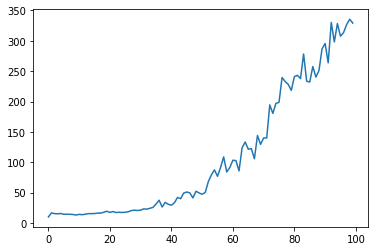

In [8]:
history = sarsa()

plt.plot(history)
plt.show()

In [2]:
class DQN:
    
    def __init__(self):
        self.env = gym.make('CartPole-v1')
        
        self.LEARNING_RATE = 0.01
        self.MEMORY_SIZE = 1024
        self.EPSILON = 0.1
        self.EPISODES = 300
        self.BATCH_SIZE = 256
        self.GAMMA = 0.95
        
        self.observation_space = self.env.observation_space.shape
        self.action_space = self.env.action_space.n
        
        self.memory = deque(maxlen=self.MEMORY_SIZE)
        self.memory_states = deque(maxlen=self.MEMORY_SIZE)
        self.memory_actions = deque(maxlen=self.MEMORY_SIZE)
        self.memory_rewards = deque(maxlen=self.MEMORY_SIZE)
        self.memory_next_states = deque(maxlen=self.MEMORY_SIZE)
        self.memory_done = deque(maxlen=self.MEMORY_SIZE)
        
        self.model = self.build_model()
        self.model_copy = None


    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_shape=self.observation_space, activation="relu"))
        model.add(Dense(24, activation="relu"))
        model.add(Dense(self.action_space, activation="linear"))
        model.compile(loss="mse", optimizer=RMSprop(lr=self.LEARNING_RATE))
        return model
    
    def remember(self, experience):
        self.memory.append(experience)
#         self.memory_states.append(experience[0])
#         self.memory_actions.append(experience[1])
#         self.memory_rewards.append(experience[2])
#         self.memory_next_states.append(experience[3])
#         self.memory_done.append(experience[4])
        
    def reshape_state(self, s):
        return np.array(s).reshape((1, 4))
    
    def choose_action(self, s):
        if np.random.random() < self.EPSILON:
            return self.env.action_space.sample()
        else:
            q_values = self.model.predict(self.reshape_state(s))[0]
            return np.argmax(q_values)
    
    def get_random_minibatch(self):
        idx = np.random.choice(len(self.memory), size=self.BATCH_SIZE, replace=False)
        return np.array(self.memory)[idx]

    def experience_replay(self):
        if len(self.memory_states) < self.BATCH_SIZE:
            return
        
        idx = np.random.choice(len(self.memory), size=self.BATCH_SIZE, replace=False)
        minibatch = np.array(self.memory)[idx]
        
        states = np.array(list(minibatch[:, 0]))
        actions = minibatch[:, 1]
        rewards = minibatch[:, 2]
        next_states = np.array(list(minibatch[:, 3]))
        done = minibatch[:, 4]
        
        
#         print(type(states))
#         states = np.array(self.memory_states)[idx]
#         print(type(states))
#         actions = np.array(self.memory_actions)[idx]
#         rewards = np.array(self.memory_rewards)[idx]
#         next_states = np.array(self.memory_next_states)[idx]
#         done = np.array(self.memory_done)[idx]
# #         print(np.array(self.memory_done)[idx])
        
#         print(states)
        
        predictions_s = self.model.predict(states)
        predictions_for_next_s = self.model.predict(next_states)
        
        estimated_max_q_values = rewards + self.GAMMA * np.max(predictions_for_next_s, axis=1)
        
        for i in range(len(predictions_s)):
            # Terminal states have no future, so we should set their Q-value to their immediate reward.
            predictions_s[i][actions[i]] = estimated_max_q_values[i] if done[i] is False else rewards[i]

        self.model.fit(states, predictions_s, verbose=0, epochs=1)
            
    
    def train(self):
        history = deque()
        
        for e in range(self.EPISODES):
            
            s = env.reset()
#             if e%5 == 0:
#                 self.model_copy = clone_model(self.model)
#                 self.model_copy.set_weights(self.model.get_weights())
            reward_sum = 0
            done = False
            while not done:
                
#                 if e >= self.EPISODES-2:
#                     env.render()
                
                a = self.choose_action(s)
                s_next, reward, done, _ = env.step(a)
                
                experience = (s, a, reward, s_next, done)
                self.remember(experience)
            
                self.experience_replay()     
                
                s = s_next
                reward_sum += reward

            print(f"Episode: {e}, total reward: {reward_sum}")
            history.append(reward_sum)
            
        return history

Episode: 0, total reward: 43.0
Episode: 1, total reward: 16.0
Episode: 2, total reward: 56.0
Episode: 3, total reward: 48.0
Episode: 4, total reward: 57.0
Episode: 5, total reward: 33.0
Episode: 6, total reward: 35.0
Episode: 7, total reward: 23.0
Episode: 8, total reward: 55.0
Episode: 9, total reward: 48.0
Episode: 10, total reward: 19.0
Episode: 11, total reward: 40.0
Episode: 12, total reward: 20.0
Episode: 13, total reward: 54.0
Episode: 14, total reward: 14.0
Episode: 15, total reward: 57.0
Episode: 16, total reward: 58.0
Episode: 17, total reward: 14.0
Episode: 18, total reward: 60.0
Episode: 19, total reward: 16.0
Episode: 20, total reward: 55.0
Episode: 21, total reward: 40.0
Episode: 22, total reward: 56.0
Episode: 23, total reward: 54.0
Episode: 24, total reward: 63.0
Episode: 25, total reward: 83.0
Episode: 26, total reward: 34.0
Episode: 27, total reward: 46.0
Episode: 28, total reward: 82.0
Episode: 29, total reward: 16.0
Episode: 30, total reward: 30.0
Episode: 31, total

Episode: 257, total reward: 36.0
Episode: 258, total reward: 34.0
Episode: 259, total reward: 54.0
Episode: 260, total reward: 35.0
Episode: 261, total reward: 35.0
Episode: 262, total reward: 45.0
Episode: 263, total reward: 33.0
Episode: 264, total reward: 63.0
Episode: 265, total reward: 54.0
Episode: 266, total reward: 57.0
Episode: 267, total reward: 69.0
Episode: 268, total reward: 16.0
Episode: 269, total reward: 47.0
Episode: 270, total reward: 48.0
Episode: 271, total reward: 15.0
Episode: 272, total reward: 62.0
Episode: 273, total reward: 51.0
Episode: 274, total reward: 57.0
Episode: 275, total reward: 20.0
Episode: 276, total reward: 50.0
Episode: 277, total reward: 53.0
Episode: 278, total reward: 18.0
Episode: 279, total reward: 14.0
Episode: 280, total reward: 52.0
Episode: 281, total reward: 51.0
Episode: 282, total reward: 44.0
Episode: 283, total reward: 42.0
Episode: 284, total reward: 19.0
Episode: 285, total reward: 22.0
Episode: 286, total reward: 49.0
Episode: 2

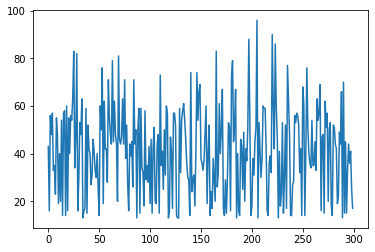

In [3]:
dqn = DQN()
history = dqn.train()

plt.plot(history)
plt.show()